# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Al abrir cada unos de los archivos csv, se observa que no se encuentran divididos por ',' como es comun sino por el simbolo ';' por lo que agregue a cada uno el parametro sep indicandole que debe tomar el simbolo ';' como el separador de los datos; la fila de las tablas que se esta tomando como titulo parece ser correcta en todos los casos por lo que no considere necesario agregar ningun parametro al respecto. Agregue el parametro show_counts para que .info pueda mostrarme el resumen de los datos. 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
# importar librerías

In [2]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')
# leer conjuntos de datos en los DataFrames

In [3]:
df_orders.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_products.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_aisles.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departments.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
df_order_products.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Respecto de los DataFrames que se analizan se observa lo siguientes: 
1. df_orders: order_hour_of_day deberia ser del tipo datetime y days_since_prior_order deberia ser entero, esta ultima columna tambien tiene valores ausentes. 

2. df_products: se observa que la columan product_name tiene valores ausentes. 

3. df_aisles: No se observan datos ausentes y los tipo de cada columna son correctos  

4. df_departments: No se observan datos ausentes y los tipo de cada columna son correctos 

5. df_order_products: La columna add_to_cart_order deberia ser un campo entero y tiene valores ausentes. 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

En este caso hay que in depurando tabla por tabla los valores duplicados y ausentes. Eliminar las filas que se encuentren como totalmente duplicadas en cada dataset y llenar los valores ausentes con campos que podamos cosiderar como los mas adecuados de acuerdo a la informacion con la que contamos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:

print(df_orders.duplicated().sum())


# Revisa si hay pedidos duplicados


15


Segun los resultados obtenidos hay 15 filas duplicadas, todas ellas son de pedidos hechos el miercoles a las 2:00 am 


In [9]:
df_orders_filtered = df_orders.loc[(df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)]
print(df_orders_filtered)


# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   


Este resultado sugiere dos posibilidades que hay algunos usuarios que cotidianamente realizan sus compras a esta hora el mismo dia de la semana o bien que existen datos mal ingresados o duplicados

In [10]:
df_orders.drop_duplicates(inplace=True)
# Elimina los pedidos duplicados
df_orders_filtered1 = df_orders.loc[(df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)]
print(df_orders_filtered1)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [11]:
print(df_orders.duplicated().sum())
# Vuelve a verificar si hay filas duplicadas


0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum())

0


Despues de realizar el preprocesamiento de estos datos, se confirma que 15 de los pedidos realizados a las 2:00 am del miercoles eran filas completamente duplicadas. Por lo que las elimine y reconfirme que no existieran mas ordenes con el mismo id. 

### `products` data frame

In [13]:

print(df_products.duplicated().sum())
# Verifica si hay filas totalmente duplicadas


0


In [14]:
print(df_products['department_id'].duplicated().sum())
# Revisa únicamente si hay ID de departamentos duplicados


49673


In [15]:
df_products['product_name']=df_products['product_name'].str.upper()
print(df_products['product_name'].duplicated().sum())
print(df_products['product_name'].value_counts())

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


1361
product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64


In [16]:

duplicated_products = df_products[df_products.duplicated(subset=['product_name'], keep=False) & ~df_products['product_name'].isnull()]
print(duplicated_products)
# Revisa si hay nombres duplicados de productos no faltantes


       product_id                                     product_name  aisle_id  \
41             42                                  BIOTIN 1000 MCG        47   
185           186       FRESH SCENT DISHWASHER DETERGENT WITH DAWN        74   
515           516                           AMERICAN CHEESE SLICES        21   
1538         1539                                 CAULIFLOWER HEAD        83   
1783         1784              NUTRITION PROTEIN MIX BLUEBERRY NUT       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
41              

De la revision se observa que si hay ID de departamentos duplicados, tambien hay nombres de productos duplicados y la mayoria de esos duplicados recae en productos 'unknown' hay 1465 productos duplicados no faltantes. 

### `departments` data frame

In [17]:
#print(df_departments.head())
print(df_departments.duplicated().sum())
# Revisa si hay filas totalmente duplicadas

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


En el DataFrame departments no se encuentraron datos duplicados. 

### `aisles` data frame

In [19]:
#print(df_aisles)
print(df_aisles.duplicated().sum())

# Revisa si hay filas totalmente duplicadas

0


In [20]:
print(df_aisles['aisle_id'].duplicated().sum())
# Revisa únicamente si hay IDs duplicadas de productos

0


En el DataFrame aisles no se encuentraron datos duplicados. 

### `order_products` data frame

In [21]:
print(df_order_products.head(10))
print(df_order_products.duplicated().sum())
# Revisa si hay filas totalmente duplicadas


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1
0


In [22]:

print(df_order_products['order_id'].value_counts())
print()
print(df_order_products['product_id'].value_counts())
# Vuelve a verificar si hay cualquier otro duplicado engañoso


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64


En el DataFrame order_products no se encuentraron datos duplicados ni explicitos ni implicitos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())
print(df_products['product_name'].value_counts(dropna=False))

1258
product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64


1258 filas en la columna product_name se encuentran vacios

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
#print(df_products.head())
aisle_100 = df_products[(df_products['product_name'].isna())]

print(aisle_100)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Ya que 1258 filas se encuentraban vacias, al realizar un doble filtro confirmo que esos 1258 campos vacios efectivamente pertenecen al pasillo 100 

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(aisle_100['department_id'].unique())

[21]


Con la tabla ya filtrada mostrando unicamente los productos donde el nombre es NaN y que pertenecen al pasillo 100, verifique que valores unicos contiene la columna department_id y confirme que todos los valores ausentes pertenecen al pasillo 100 departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(df_departments[df_departments['department_id']==21])
print()
print(df_aisles[df_aisles['aisle_id']==100])


    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Al parecer este pasillo y departamento no fueron correctamente llenados, no sabemos el nombre de los productos ni del departamento o pasillo al que pertenecen

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products['product_name'].isna().sum())

0


Ya que no podemos saber que tipo de productos fueron vendidos porque tampoco tenemos la referencia de a que pasillo o departamento pertenecian se llanan con 'Unknown'

### `orders` data frame

In [28]:
print(df_orders.isna().sum())
# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:

print(df_orders[(df_orders['days_since_prior_order'].isna()) & ~(df_orders['order_number'] == 1)])

# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Al parecer todos los valores ausentes en la columna days_since_prior_order pertenen a clientes que estan ordenando por primera vez

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())


1.0
64.0


Conforme a los valores minimos y maximos encontrados podemos deducir que el maximo de articulos que ha presentado un pedido son 64

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_filter = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(df_filter)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_64products= df_filter.groupby('order_id')['product_id'].count().reset_index()
#print(df_64products)
print(df_64products[df_64products['product_id']>64])

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
product_id_count = df_filter.groupby('order_id')['product_id'].count()
print(product_id_count.min())
print(product_id_count.max())
print(product_id_count.sort_values())


# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


Empty DataFrame
Columns: [order_id, product_id]
Index: []
1
63
order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


Ningun pedido tiene mas de 64 productos ya que el valor maximo del conteo es de 63

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype(int)
print(df_order_products.isna().sum())


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Se encontraron 836 valores ausentes en la columna ad to cart order los cuales fueron llenados con el valor 999 para evitar que interfieran entre los minimos y maximos que se encuentran registrados en la columna y se convirtio el tipo de dato de la columna a entero 

## Conclusiones

Se debe verificar lo relativo al pasillo 100 departamento 21 ya que por alguna razon estos datos estan completamente ausentes. Tambien se observa que algunos usuarios tienen la costumbre de realizar sus compras los miercoles a las 2:00 am, seria bueno indagar un poco mas en el tema, verificando que tipo de productos compran, si son usuarios recurrentes y que tipo de productos compran. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())
print(df_orders['order_hour_of_day'].unique())

0
23
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [36]:
print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())
print(df_orders['order_dow'].unique())

0
6
[6 5 0 4 3 1 2]


Despues de verificar los valores unicos que contiene cada columna, los datos parecen ser correcto en cuanto a horas del dia y dias de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

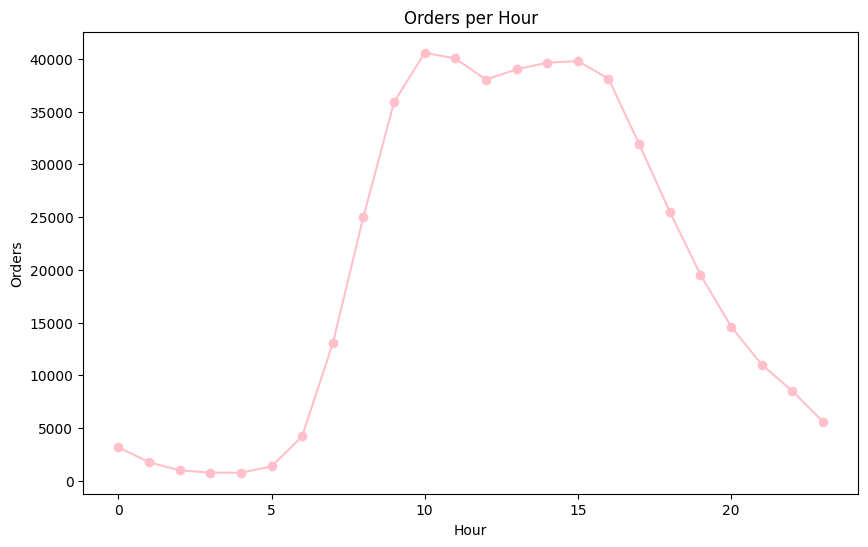

In [37]:
#print(df_orders.head())
numer_of_orders=df_orders.groupby('order_hour_of_day')['user_id'].count()
#print(numer_of_orders)

numer_of_orders.plot(style='o-',
                     title='Orders per Hour',
                     xlabel='Hour',
                     ylabel='Orders',
                     figsize=(10,6),
                     color= 'pink'
              )
plt.show()

Los datos muestran que la hora mas concurrida para realizar las compras es las 10:00 am. Entre las 10:00 am y 4:00 pm se realizan la mayor cantidad de pedidos

### [A3] ¿Qué día de la semana compran víveres las personas?

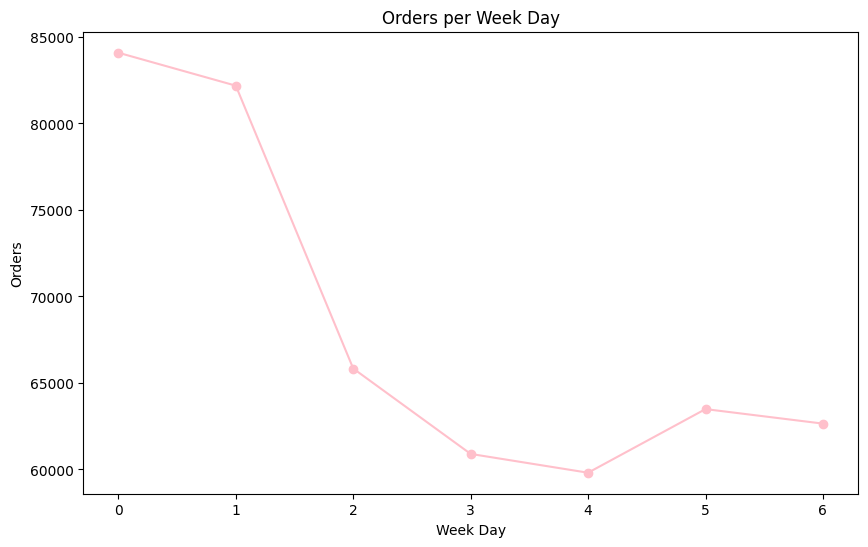

In [38]:
orders_week_day=df_orders.groupby('order_dow')['user_id'].count()

orders_week_day.plot(style='o-',
                     title='Orders per Week Day',
                     xlabel='Week Day',
                     ylabel='Orders',
                     figsize=(10,6),
                     color= 'pink')

plt.show()

El dia de la semana con mayor cantidad de pedidos es el dominigo, esto podria deberse a que la gente realiza las compras de toda la semana este dia. Las cantidad de pedidos disminuye conforme transcurren los dia de la semana siendo el punto mas bajo el dia jueves. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


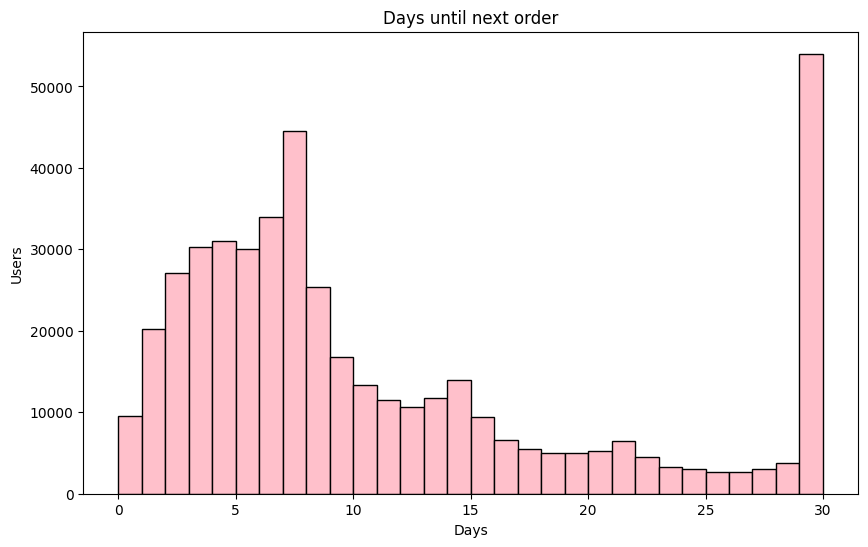

In [39]:
print(df_orders['days_since_prior_order'].describe())
df_orders_clean=df_orders.dropna(subset=['days_since_prior_order'])
average_days_between_orders = df_orders_clean['days_since_prior_order'].mean()
plt.figure(figsize=(10, 6))
plt.hist(df_orders_clean['days_since_prior_order'], bins=30, color='pink', edgecolor='black')
plt.title('Days until next order')
plt.xlabel('Days')
plt.ylabel('Users')
plt.show()

Elimine los valores nulos para que no afectaran la grafica. Al parecer la mayoria de personas esperan 30 dias hasta su siguiente compra, esto podria deberse a que realizan las compras para basicas para todo el mes. En promedio las personas esperan 11 dias hasta su siguiente pedido y como se observa con el metodo describe los valores minimos y maximos son 0 y 30 dias respectivamente

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:


df_days = df_orders[(df_orders['order_dow'] == 3) | (df_orders['order_dow'] ==6)]
df_days = df_days.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()


In [41]:
df_pivot = df_days.pivot(index='order_hour_of_day', columns='order_dow', values='order_id')

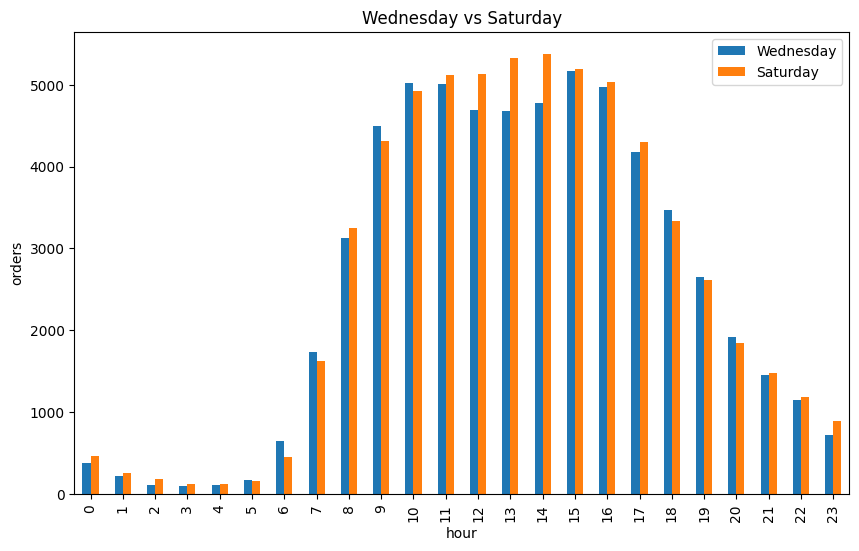

In [42]:
df_pivot.plot(kind='bar',
              figsize=(10,6),
              title='Wednesday vs Saturday',
              xlabel='hour',
              ylabel='orders'
              )
plt.legend(['Wednesday', 'Saturday'])

plt.show()


Existe mas movimiento de pedidos los sabados en los horarios entre las 11:00 am y las 5:00 pm; por el contrario en los horarios 6:00 am a las 10:00 am se observa mayor movimiento el dia miercoles. El resto de las horas la cantidad de pedidos es muy similar entre los dos dias. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
#print(df_orders.head())

orders_per_customer = df_orders.groupby('user_id')['order_number'].count()
orders_distribution = orders_per_customer.value_counts()




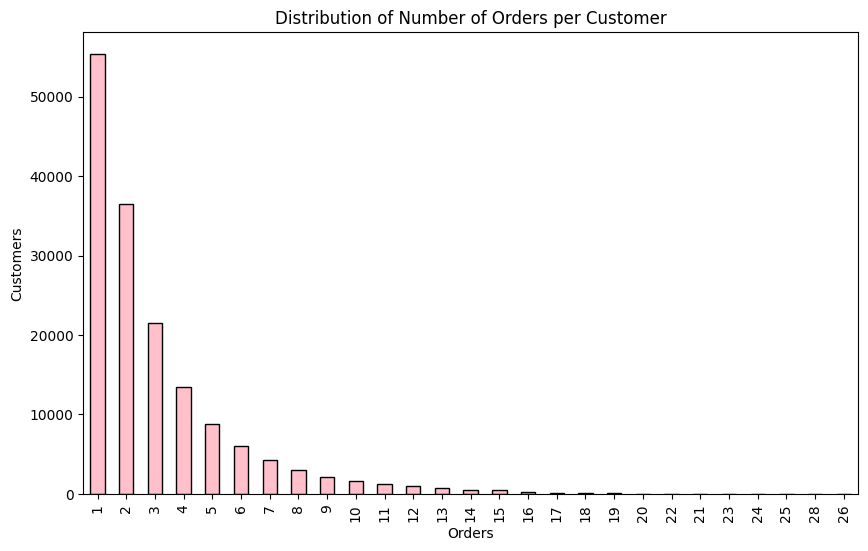

In [44]:
orders_distribution.plot(kind='bar',
                        figsize=(10,6),
                         title='Distribution of Number of Orders per Customer',
                         xlabel='Orders',
                         ylabel='Customers',
                         color='pink',
                         edgecolor='black'
                        )
                       

plt.show()

Conforme a la grafica se observa que la mayoria de clientes piden solo una vez. Este dato parece relevante y habria que indagar mas ya que al parecer no hay una recurrencia de los clientes que estan usando la plataforma. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:

df_merge=df_order_products.merge(df_products, on='product_id')


In [46]:
df_count_products=df_merge.groupby(['product_id', 'product_name'])['order_id'].count()


In [47]:
df_sorted = df_count_products.reset_index(name='order_count').sort_values(by='order_count', ascending=False)
print(df_sorted.head(20))

       product_id              product_name  order_count
22808       24852                    BANANA        66050
12025       13176    BAG OF ORGANIC BANANAS        53297
19370       21137      ORGANIC STRAWBERRIES        37039
20077       21903      ORGANIC BABY SPINACH        33971
43271       47209      ORGANIC HASS AVOCADO        29773
43788       47766           ORGANIC AVOCADO        24689
43663       47626               LARGE LEMON        21495
15364       16797              STRAWBERRIES        20018
24047       26209                     LIMES        19690
25556       27845        ORGANIC WHOLE MILK        19600
25666       27966       ORGANIC RASPBERRIES        19197
21025       22935      ORGANIC YELLOW ONION        15898
22908       24964            ORGANIC GARLIC        15292
41244       45007          ORGANIC ZUCCHINI        14584
35996       39275       ORGANIC BLUEBERRIES        13879
45561       49683            CUCUMBER KIRBY        13675
25889       28204        ORGANI

Parece ser que los productos mas populares son las frutas organicas, en especial la banana. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
products_per_order=df_order_products.groupby('order_id')['product_id'].count()

In [49]:

print(products_per_order.mean())


10.098983215049127


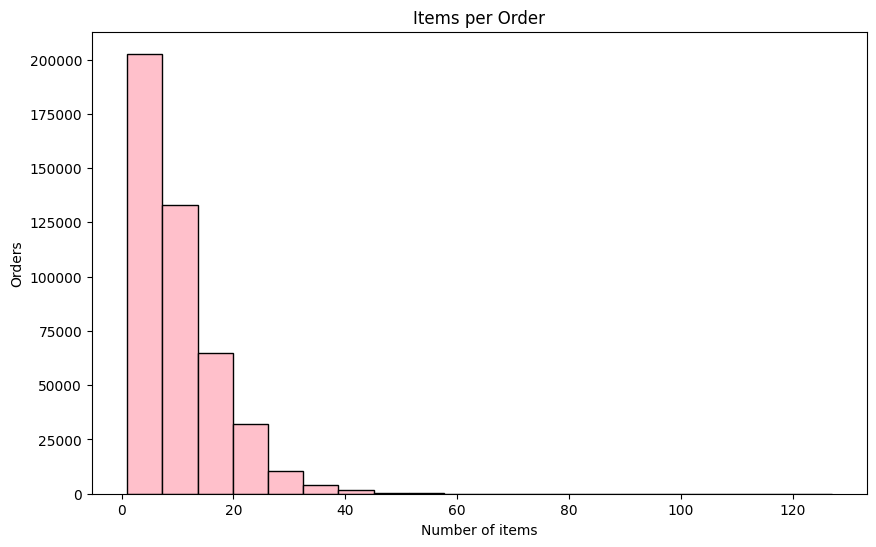

In [50]:

plt.figure(figsize=(10, 6))
plt.hist(products_per_order, bins=20, color='pink', edgecolor='black')
plt.title('Items per Order')
plt.xlabel('Number of items')
plt.ylabel('Orders')
plt.show()

Conforme a los datos agrupados se observa que en promedio se compran 10 articulos por pedido. La mayoria compra de 1 a 5 articulos por pedido y casi ninguna orden contiene mas de 40 articulos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
df_merge=df_order_products.merge(df_products, on='product_id')


In [52]:
df_20_products= df_merge.query('reordered==1')


In [53]:
df_20_products = df_20_products.groupby(['product_id', 'product_name'])['order_id'].count()


In [54]:
df_20_products = df_20_products.reset_index(name='order_count').sort_values(by='order_count', ascending=False)
print(df_20_products.head(20))

       product_id              product_name  order_count
18104       24852                    BANANA        55763
9528        13176    BAG OF ORGANIC BANANAS        44450
15368       21137      ORGANIC STRAWBERRIES        28639
15936       21903      ORGANIC BABY SPINACH        26233
34407       47209      ORGANIC HASS AVOCADO        23629
34828       47766           ORGANIC AVOCADO        18743
20285       27845        ORGANIC WHOLE MILK        16251
34725       47626               LARGE LEMON        15044
20375       27966       ORGANIC RASPBERRIES        14748
12193       16797              STRAWBERRIES        13945
19088       26209                     LIMES        13327
16700       22935      ORGANIC YELLOW ONION        11145
18186       24964            ORGANIC GARLIC        10411
32792       45007          ORGANIC ZUCCHINI        10076
36219       49683            CUCUMBER KIRBY         9538
20543       28204        ORGANIC FUJI APPLE         8989
5978         8277  APPLE HONEYC

Los articulos mas reordenados son las frutar organicas, en especial la banana

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
product_reorder_count = df_merge.groupby('product_id')['reordered'].agg(['sum', 'count'])

In [56]:
product_reorder_count['reorder_ratio'] = product_reorder_count['sum'] / product_reorder_count['count']

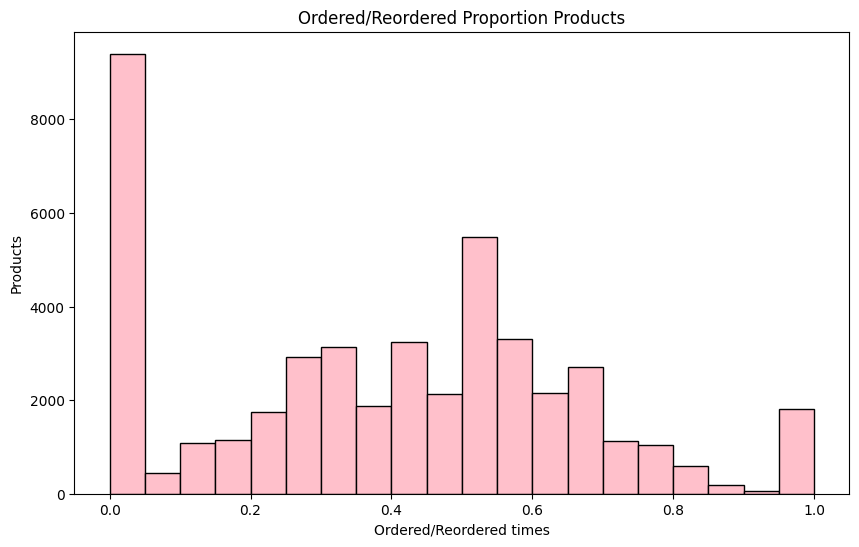

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(product_reorder_count['reorder_ratio'], bins=20, color='pink', edgecolor='black')
plt.title('Ordered/Reordered Proportion Products')
plt.xlabel('Ordered/Reordered times')
plt.ylabel('Products')
plt.show()

Al parecer la mayoria de los articulos no son reordenados.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [58]:
df_orders_products=df_orders.merge(df_order_products, on='order_id')
product_reorder_client = df_orders_products.groupby('user_id').agg({'reordered' : 'sum', 'product_id' : 'count'})
product_reorder_client['reorder_ratio'] = product_reorder_client['reordered'] / product_reorder_client['product_id']



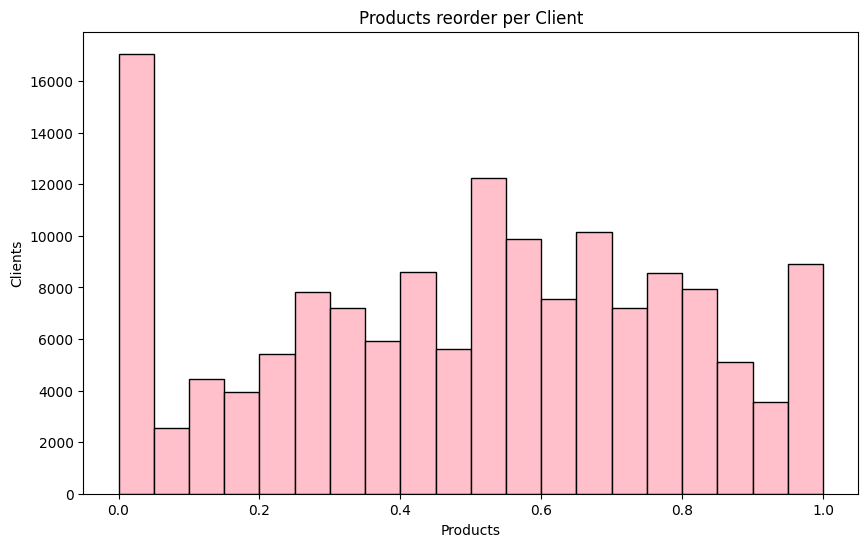

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(product_reorder_client['reorder_ratio'], bins=20, color='pink', edgecolor='black')

plt.title('Products reorder per Client')
plt.xlabel('Products')
plt.ylabel('Clients')
plt.show()

Aparentemente los resultados concuerdan con el punto anterior, la mayoria de los articulos no son reordenados y los clientes no ponen en su carrito articulos que ya hayan pedido 


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [60]:
df_first_product= df_merge.query('add_to_cart_order==1')


In [61]:

df_first_product = df_first_product.groupby(['product_name'])['order_id'].count()

In [62]:

df_first_product = df_first_product.reset_index(name='order_count').sort_values(by='order_count', ascending=False)
print(df_first_product.head(20))

                      product_name  order_count
1908                        BANANA        15562
1793        BAG OF ORGANIC BANANAS        11026
17478           ORGANIC WHOLE MILK         4363
17120         ORGANIC STRAWBERRIES         3946
16046         ORGANIC HASS AVOCADO         3390
15091         ORGANIC BABY SPINACH         3336
15069              ORGANIC AVOCADO         3044
22707                 SPRING WATER         2336
22949                 STRAWBERRIES         2308
16739          ORGANIC RASPBERRIES         2024
22454   SPARKLING WATER GRAPEFRUIT         1914
16029          ORGANIC HALF & HALF         1797
11714                  LARGE LEMON         1737
22148                         SODA         1733
16821     ORGANIC REDUCED FAT MILK         1397
12252                        LIMES         1370
10166                HASS AVOCADOS         1340
16820  ORGANIC REDUCED FAT 2% MILK         1310
10026                  HALF & HALF         1309
17536         ORGANIC YELLOW ONION      

Nuevamente las frutas organicas parecen ser el producto mas deseado y el producto estrella la banana

### Conclusion general del proyecto:

Basándonos en los datos recopilados y analizados, se pueden extraer varias conclusiones significativas sobre el comportamiento de los clientes en relación con las compras en la plataforma. En primer lugar, se observa un patrón claro en cuanto a la hora y el día preferidos para realizar pedidos, siendo las horas mas concurridas entre las 10:00 a.m. a 4:00 p.m. de los domingos. El trafico elevado de pedidos el dia domingo sugiere que muchos usuarios utilizan este día para abastecerse de productos para toda la semana. Asimismo, se destaca que la mayoría de los clientes esperan aproximadamente un mes entre cada compra, indicando que tienden a realizar compras mensuales para artículos básicos. En términos de productos, las frutas orgánicas, especialmente la banana, son claramente los favoritos entre los consumidores, siendo los artículos más reordenados, mas agregados al carrito y tambien los mas comprados. Sin embargo, es notable que la mayoría de los clientes solo realizan una compra, lo que sugiere una falta de fidelización o recurrencia en el uso de la plataforma. 

En general los resultados sugieren que se debe trabajar en formas para hacer que los clientes tengan mas recurrencia de uso en la plataforma, tomando en consideracion que los productos que mas buscan son las frutas organicas.